<a href="https://colab.research.google.com/github/sai-123-code/learngit/blob/master/MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
# For splitting our entire data into two parts
from sklearn.model_selection import train_test_split


In [2]:
# Importing dataset
from sklearn.datasets import load_iris


In [3]:
data = load_iris()
X = data['data']
y = data['target']

print('Features of Instance 1:', X[0])
print('Target of Instance 1:', y[0])


Features of Instance 1: [5.1 3.5 1.4 0.2]
Target of Instance 1: 0


In [4]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test  = train_test_split(X,y,test_size=0.2)

# Let's view the shapes of all train and test data.
print('Shape of training data:', X_train.shape)
print('Shape of training targets:', y_train.shape)
print('Shape of test data:', X_test.shape)
print('Shape of test targets:', y_test.shape)


Shape of training data: (120, 4)
Shape of training targets: (120,)
Shape of test data: (30, 4)
Shape of test targets: (30,)


In [10]:
# Building ANN Model: Fully-conected (Dense) layers: 
#   Input layer with 4 nodes, 
#   1 hiddden layer with 10 nodes and 'relu' activation function
#   Output layer with 3 nodes and 'softmax' activation function
model = keras.models.Sequential([
    keras.layers.Dense(units=10, activation='relu', input_shape=(4,)),
    keras.layers.Dense(units=3, activation='softmax')
])

# View the Model Summary
print(model.summary())


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 10)                50        
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 33        
Total params: 83
Trainable params: 83
Non-trainable params: 0
_________________________________________________________________
None


In [11]:
model.compile(optimizer='rmsprop',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [12]:
model.fit(X_train,y_train,epochs=100,validation_data=(X_test,y_test))

Epoch 1/100
4/4 [==============================] - 0s 40ms/step - loss: 4.5307 - accuracy: 0.3250 - val_loss: 4.2034 - val_accuracy: 0.3667
Epoch 2/100
4/4 [==============================] - 0s 8ms/step - loss: 4.2530 - accuracy: 0.3250 - val_loss: 3.9958 - val_accuracy: 0.3667
Epoch 3/100
4/4 [==============================] - 0s 9ms/step - loss: 4.0577 - accuracy: 0.3250 - val_loss: 3.8303 - val_accuracy: 0.3667
Epoch 4/100
4/4 [==============================] - 0s 8ms/step - loss: 3.8911 - accuracy: 0.3250 - val_loss: 3.6778 - val_accuracy: 0.3667
Epoch 5/100
4/4 [==============================] - 0s 8ms/step - loss: 3.7371 - accuracy: 0.3250 - val_loss: 3.5335 - val_accuracy: 0.3667
Epoch 6/100
4/4 [==============================] - 0s 8ms/step - loss: 3.5910 - accuracy: 0.3250 - val_loss: 3.3965 - val_accuracy: 0.3667
Epoch 7/100
4/4 [==============================] - 0s 8ms/step - loss: 3.4514 - accuracy: 0.3250 - val_loss: 3.2671 - val_accuracy: 0.3667
Epoch 8/100
4/4 [=========

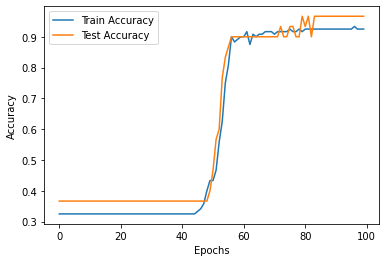

In [14]:
plt.plot(model.history.history['accuracy'],label='Train Accuracy')
plt.plot(model.history.history['val_accuracy'],label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


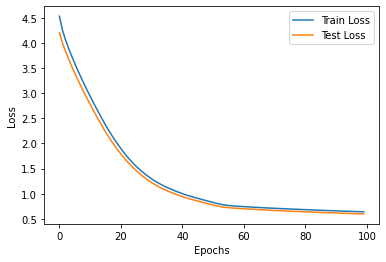

In [15]:
plt.plot(model.history.history['loss'],label='Train Loss')
plt.plot(model.history.history['val_loss'],label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


**Boston Housing-Regression analysis**

In [32]:
# Import the Modules
import keras 

from keras.datasets import boston_housing 
from keras.models import Sequential 
from keras.layers import Dense 
from keras.optimizers import RMSprop 
from keras.callbacks import EarlyStopping 
from sklearn import preprocessing 
from sklearn.preprocessing import scale


In [33]:
# Load data: Import Boston housing dataset
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()


In [34]:
# Preprocessing the dataset
x_train_scaled = preprocessing.scale(x_train) 
scaler = preprocessing.StandardScaler().fit(x_train) 
x_test_scaled = scaler.transform(x_test)


In [35]:
model = Sequential() 
model.add(Dense(64, kernel_initializer = 'normal', activation = 'relu',
input_shape = (13,))) 
model.add(Dense(64, activation = 'relu')) 
model.add(Dense(1))
print(model.summary())


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 64)                896       
_________________________________________________________________
dense_11 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________
None


In [36]:
# Model compilation
model.compile(
   loss = 'mse', 
   optimizer = RMSprop(), 
   metrics = ['mean_absolute_error']
)
# Model training
history = model.fit(
   x_train_scaled, y_train,    
   batch_size=128, 
   epochs = 500, 
   verbose = 1, 
   validation_split = 0.2, 
   callbacks = [EarlyStopping(monitor = 'val_loss', patience = 20)]
)


Epoch 1/500
3/3 [==============================] - 0s 41ms/step - loss: 572.1320 - mean_absolute_error: 22.1057 - val_loss: 633.5259 - val_mean_absolute_error: 23.4394
Epoch 2/500
3/3 [==============================] - 0s 6ms/step - loss: 559.2356 - mean_absolute_error: 21.8107 - val_loss: 622.1131 - val_mean_absolute_error: 23.2026
Epoch 3/500
3/3 [==============================] - 0s 6ms/step - loss: 548.5209 - mean_absolute_error: 21.5750 - val_loss: 610.5115 - val_mean_absolute_error: 22.9595
Epoch 4/500
3/3 [==============================] - 0s 7ms/step - loss: 537.4119 - mean_absolute_error: 21.3281 - val_loss: 598.3234 - val_mean_absolute_error: 22.6995
Epoch 5/500
3/3 [==============================] - 0s 7ms/step - loss: 525.1472 - mean_absolute_error: 21.0585 - val_loss: 583.6946 - val_mean_absolute_error: 22.3922
Epoch 6/500
3/3 [==============================] - 0s 6ms/step - loss: 510.9764 - mean_absolute_error: 20.7431 - val_loss: 568.1180 - val_mean_absolute_error: 22.05

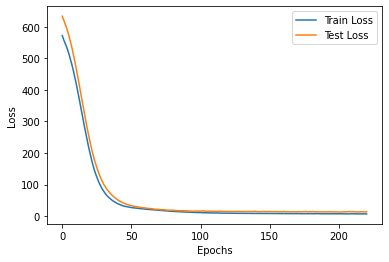

In [37]:
import matplotlib.pyplot as plt
plt.plot(model.history.history['loss'],label='Train Loss')
plt.plot(model.history.history['val_loss'],label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


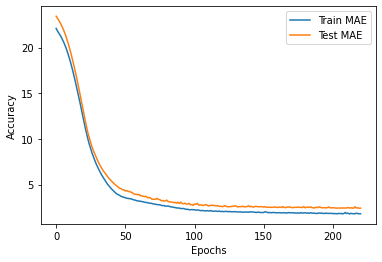

In [38]:
plt.plot(model.history.history['mean_absolute_error'],label='Train MAE')
plt.plot(model.history.history['val_mean_absolute_error'],label='Test MAE')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


In [39]:
# Predict output for test inputs
y_hat = model.predict([x_test_scaled])


In [40]:
import numpy as np
# Computation of RMSE
sse = 0
n = len(y_hat)
for i in range(n):
        sse += (y_test[i] - y_hat[i]) ** 2
    
rmse = np.sqrt(sse/len(y_hat))
print('RMSE: ' ,rmse)

# Percentage of errorr margine 
y_range = y_test.max() - y_test.min()# Then we compute the RMSE as a percentage of the range of y
error_margin = (rmse / y_range) * 100
print ('Percentage of error margine: ',error_margin)


RMSE:  [4.7243757]
Percentage of error margine:  [10.640486]


In [41]:
# Computation of R-square
sumofsquares = 0
sumofresiduals = 0
y_mean = np.mean(y_test)
for i in range(n) :
    sumofsquares += (y_test[i] - y_mean) ** 2
    sumofresiduals += (y_test[i] - y_hat[i]) ** 2
    
score  = 1 - (sumofresiduals/sumofsquares)
print("R-square value: " ,score)


R-square value:  [0.73187536]
